<a href="https://colab.research.google.com/github/melenjefaridxdd/Farid-Melenje/blob/main/semana2/Taller_Forecasting_OcupacionFarid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Cargar dataset de ocupacion de sitios de parqueo
dataparqueo = pd.read_csv('/content/SJ.csv')

In [20]:
# Revisar cabecera y cola del dataset
print(dataparqueo.head())
dataparqueo.tail()

      date  idCompany  numTrx
0  2022-08          1   68599
1  2022-09          1   86862
2  2022-10          1   99611
3  2022-11          1  109018
4  2022-12          1  115665


,date,idCompany,numTrx
13,2023-09,1,126851
14,2023-10,1,137539
15,2023-11,1,145327
16,2023-12,1,135537
17,2024-01,1,148111


In [21]:
# Formatear la columna de fecha como año y mes
dataparqueo["date"] = pd.to_datetime(dataparqueo["date"], format='%Y-%m')


In [22]:
# Verificar el nombre de los meses del dataset para comprobar que el formateo es correcto
dataparqueo.head()

,date,idCompany,numTrx
0,2022-08-01,1,68599
1,2022-09-01,1,86862
2,2022-10-01,1,99611
3,2022-11-01,1,109018
4,2022-12-01,1,115665


In [23]:
# Contar el numero de datos del dataset
dataparqueo.count()

,0
date,18
idCompany,18
numTrx,18


In [24]:
# Obtener una estadistica descriptiva básica del dataset, verificar si hay algo anormal
dataparqueo.describe()

,date,idCompany,numTrx
count,18,18.0,18.000000
mean,2023-04-16 18:40:00,1.0,120111.833333
min,2022-08-01 00:00:00,1.0,68599.000000
25%,2022-12-08 18:00:00,1.0,110679.750000
50%,2023-04-16 00:00:00,1.0,125518.500000
75%,2023-08-24 06:00:00,1.0,135321.000000
max,2024-01-01 00:00:00,1.0,148111.000000
std,NaN,0.0,20840.047288


In [25]:
# Revisar si el ldataset tiene datos nullos
dataparqueo.isnull().sum()

,0
date,0
idCompany,0
numTrx,0


In [26]:
# Establecer el campo fecha como index del dataframe
dataparqueo.set_index('date', inplace=True)

In [27]:
# Verificar nuevamente el head de la tabla y comprobar que el index ahora sea la fecha
dataparqueo.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


<Axes: xlabel='date'>

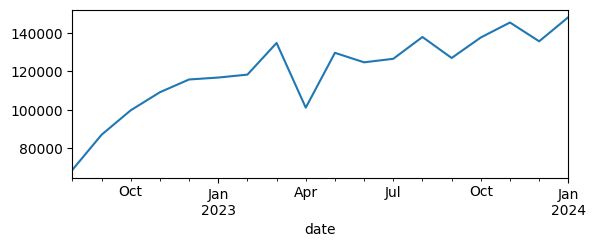

In [29]:
# Realizar una grafica de tendencia del numero de espacios ocupados en el tiempo
plt.subplot(2,1,1)
dataparqueo.numTrx.plot(style='-')


In [30]:
# Eliminar las columnas que no necesiten para realizar un sistema de prediccion de ocupacion de parqueo
dataparqueo = dataparqueo.drop(labels=['idCompany'], axis=1)

In [31]:
# Escalar entre -1 y 1 los datos de la variable a predecir
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
dataparqueo_arr = scaler.fit_transform(dataparqueo)
dataparqueo_arr

array([[-1.        ],
       [-0.5406228 ],
       [-0.21994164],
       [ 0.01667673],
       [ 0.18387162],
       [ 0.20920113],
       [ 0.24748466],
       [ 0.66198813],
       [-0.18507898],
       [ 0.53282523],
       [ 0.40859241],
       [ 0.45484958],
       [ 0.74019016],
       [ 0.46523795],
       [ 0.73407788],
       [ 0.92997283],
       [ 0.6837207 ],
       [ 1.        ]])

In [63]:
# Definir una ventana temporal adecuada para la prediccion y establecer las listas
# xtrain y ytrain para el entrenamiento

steps = 3
xtrain = []
ytrain = []

for i in range(len(dataparqueo_arr)-steps):
  xtrain.append(dataparqueo_arr[i:i+steps])
  ytrain.append(dataparqueo_arr[i+steps])


In [64]:
# Convertir las listas en arrays de numpy

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [65]:
# Verificar el shape de los datos de entrenamiento (variable independiente y dependiente)
print(xtrain.shape)
print(ytrain.shape)

(15, 3, 1)
(15, 1)


In [66]:
# Construir un modelo LSTM para realizar la predicción que tenga la siguiente arquitectura

# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 128 neuronas con activación relu
# Una capa LSTM de 64 neuronas con activación relu
# Una capa LSTM de 32 neuronas con activación relu
# Una capa LSTM de 16 neuronas con activación relu (esta seria la ultima capa LSTM)
# Agregar operaciones de Dropout de 7% despues de cada capa LSTM
# Agregar en la etapa final una red densa con dos capas con 64 neuronas y 32 neuronas
# Finalmente agregar una capa densa de salida
# Imprimir el summary del  modelo

from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(units=256, return_sequences=True, activation='relu', input_shape=(2,1)))
model.add(Dropout(0.7))
model.add(LSTM(units=256, return_sequences=True, activation='relu'))
model.add(Dropout(0.7))
model.add(LSTM(units=128, return_sequences=True, activation='relu'))
model.add(Dropout(0.7))
model.add(LSTM(units=64, return_sequences=True, activation='relu'))
model.add(Dropout(0.7))
model.add(LSTM(units=32, return_sequences=True, activation='relu'))
model.add(Dropout(0.7))
model.add(LSTM(units=16, return_sequences=False, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 2, 256)              │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 2, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 2, 256)              │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 2, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 2, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 2, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 2, 32)               │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,054,785 (4.02 MB)

 Trainable params: 1,054,785 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Compilar el modelo con una funcion de error mse y un optimizador adam
model.compile(loss='mse', optimizer='adam')

In [68]:
# Entrenar el modelo durante 100 epocas
# Usar el 10% de los datos de entrenamiento para validacion
# Usar un batch size de 16
history = model.fit(xtrain, ytrain, epochs=100, validation_split=0.1, batch_size=16,verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - loss: 0.2644 - val_loss: 0.7025
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.2491 - val_loss: 0.6706
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.2343 - val_loss: 0.6379
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.2182 - val_loss: 0.6044
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.2049 - val_loss: 0.5702
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1879 - val_loss: 0.5354
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.1757 - val_loss: 0.5003
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.1611 - val_loss: 0.4649
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.1457 - val_loss: 0.4294
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1373 - val_loss: 0.3941
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1253 - val_loss: 0.3592
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.1114 -

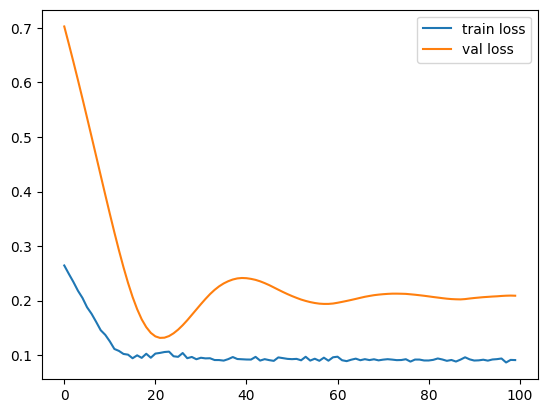

In [69]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val loss'])
plt.show()

In [61]:
# Guardar el modelo y salvarlo en disco
model.save('myparkingforecasting.h5')

In [71]:
# Tome N registros historicos de su dataset y realice la predicción de ocupación para un mes particular
N = 10
mes_prediccion = '2024-10-01'
data_ultimos_N = dataparqueo[-N:]
data_ultimos_N_arr = scaler.transform(data_ultimos_N)
xtest = np.array([data_ultimos_N_arr])
y_pred = model.predict(xtest)
y_pred_original = scaler.inverse_transform(y_pred)

print(f"Predicción de ocupación para {mes_prediccion}: {y_pred_original[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
Predicción de ocupación para 2024-10-01: 125432.953125


In [ ]:
# Proponga una arquitectura que permita recibir como parametros de entrada no solo los historicos de la
# serie temporal sino tambien información adicional relevante como por ejemplo el mes para el cual se
# realiza la predicción, o el número de dias festivos del mes de predicción